# Red Neuronal para Multiclasificación

## Clasificación binaria

El perceptrón representa una sola neurona con una capacidad limitada. Para el caso específico de la clasificación binaria, esta neurona artificial se puede modelar como una combinación lineal de entradas con la adición de una entrada constante con valor 1 llamada *bias*, y sobre la salida opera una función que da como resultado 0 o 1.

<center>
    <img src="perceptron.png" width="400">
    Ejemplo esquemático de un perceptrón.
</center>

***

$$ z_1 = \sum_{i = 0}^n{w_i \cdot x_i} $$

$$ a_1 = f(z_1) = \frac{1}{1+e^{-z_1}} $$


<center>
Ecuaciones del perceptrón.
</center>

#### Ejercicio 1
Implementar el perceptrón.

In [120]:
# Módulos importados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [121]:
# Implementación del perceptrón

# Crear una o varias variables para los pesos de las entradas dependiendo del número de entradas.
# Deben tener valores iniciales aleatorios entre 0 y 1.
inputs = np.array([[0,1], [0,0], [1,1], [1,0], [0,1] ,[1,1]]) #array para probar ejercicio 1
class Perceptronio:
    def __init__(self):
        self.pesos = [] #inicializamos los pesos
    def gen_pesos(self):
        self.pesos = np.random.choice([0., 1.], size=((1 + inputs.shape[1]),), p=[.5, .5]) #Se generan pesos entre 0 y 1 random
    def predict(self, inputs):
        z = np.dot(inputs, self.pesos[1:]) + self.pesos[0] # función dot para obtener la suma de xi.wi
        #print(z), se comenta por que sale un cuadro enorme de texto con los valores ya aplicando en entrenamiento
        phi = np.where(z >= 0.0, 1, 0)# se seleccionan de
        return phi

perceptronio = Perceptronio() #Se crea instancia
perceptronio.gen_pesos() #generar datos muestra
#prueba de funcionamiento
phi = perceptronio.predict(inputs) # demo de ejecución
print (phi)

[1 1 1 1 1 1]


Para poder evaluar el desempeño del perceptrón, se necesita utilizar datos etiquetados para comparar. Para ello se hace uso del famoso conjunto de datos *Iris*, en específico se utilizarán solamente dos especies: *Setosa* y *Versicolor*. Además, solo se considerarán dos propiedades, longitud de sépalo y longitud de pétalo, para fines de visualización.

In [122]:
# Base de datos Iris
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Selección de Setosa (0) y Versicolor (1)
data_y = iris_data.iloc[0:100, 4].values
data_y = np.where(data_y == 'Iris-setosa', 0, 1)

# Selección de longitud de sépalo y pétalo
data_x = iris_data.iloc[0:100, [0,2]].values
#print(data_x)
#print(data_x[1:])

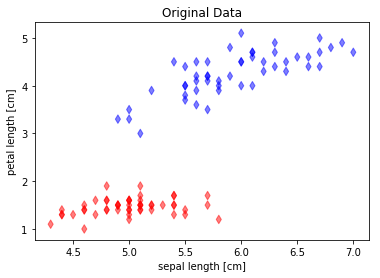

In [123]:
# Gráfica de los datos
plt.title('Original Data')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
data_color = ['r' if i == 0 else 'b' for i in data_y]
plt.scatter(data_x[:,0],data_x[:,1],c=data_color, marker='d', alpha=0.5)
plt.show()

Utilizando una instancia del perceptrón creado anteriormente, la predicción que generaría para este conjunto de datos sería, lo más probable, incorrecta. Esto se debe a que los pesos están inicializados de manera aleatoria.

Para poder entrenar al perceptron, necesita tener una manera de corregir apropiadamente los pesos de sus entradas.

### SGD
El método de Descenso de Gradiente Estocástico (SGD por sus siglas en inglés) permite encontrar el mínimo de una función con la información de su derivada. En este caso, la función a minimizar es la pérdida, que representa el error en la predicción del perceptrón comparado con el valor real. Para el perceptrón, la ecuación del SGD está dada por:

$$ w^{n+1}_i = w^n_i + \eta \cdot (y_{real} - y_{pred}) \cdot x_i $$

Donde $w^{n+1}_i$ es el nuevo valor para el peso de la $i$-ésima entrada, $w^n_i$ es el valor del peso actual, y $\eta$ es la razón de aprendizaje. Éste último valor controla la velocidad en la que el perceptrón se va aprendiendo de sus errores, y normalmente tiene un valor entre 0 y 1.

#### Ejercicio 2
Expandir la funcionalidad del perceptrón con una función de SGD:

In [124]:
# Implementar la función de SGD para calcular nuevos pesos a las entradas tomando en cuenta un conjunto de datos de entrada con sus respectivas
# salidas. Además de estos valores de entrada, recibe un valor para la taza de aprendizaje

#se agrega una propiedad para que tome en cuenta la tasa
def get_learning_rate(self):
        return self.learning_rate
def set_learning_rate(self, value):
        self.learning_rate = value
Perceptronio.get_learning_rate = get_learning_rate
Perceptronio.set_learning_rate = set_learning_rate


def sgd(self, inputs, label):
    for i, l in zip(inputs, label): #se recorren correspondientemente xs,ys
        delta_w = self.learning_rate * (l - self.predict(i)) #se multiplica la tasa de aprendizaje
        self.pesos[1:] += delta_w * i #Se actualiza peso 
        self.pesos[0] += delta_w #Se actualiza peso
    return self

#se extiende la función sgd
Perceptronio.sgd = sgd

### Entrenamiento
Para poder entrenar el perceptrón, es necesario dividir la data que se tiene en dos partes:
1. Data de entrenamiento
1. Data de validación

La data de entrenamiento se utiliza para realizar ajustes en los pesos de las entradas, mientras que la data de validación se utiliza para observar que la precisión aumenta de forma generalizada y no se realize un *overfitting*. **No** se realiza ajuste de pesos con estos datos.

Una técnica aplicada usualmente para el entrenamiento es dividir los datos que se tienen en 80-20, es decir, 80% se utiliza como data de entrenamiento, mientras que el 20% restante como data de validación. Es importante que ambos conjuntos de datos tengan una distribución adecuada de los posibles casos.

#### Ejercicio 3
Expandir la funcionalidad del perceptrón con una función de entrenamiento:

In [125]:
# Implementar la función de entrenamiento para el perceptrón, tomando como entrada un conjunto grande de valores de entrada con sus respectivos
# valores de salida. Además recibe el valor para la taza de aprendizaje y un número de 'épocas', las cuales indican cuantas veces se realiza el
# el proceso de entrenamiento.

#se agrega una propiedad para que tome en cuenta el número de iteraciones
def get_epochs(self):
        return self.epochs
def set_epochs(self, value):
        self.epochs = value
        
Perceptronio.get_epochs = get_epochs
Perceptronio.set_epochs = set_epochs


def train(self, train_inputs, train_labels):
    self.pesos = np.zeros(1 + train_inputs.shape[1]) #Crea ceros para los pesos para 1+N posiciones
    for _ in range(self.epochs):
        sgd(self, train_inputs, train_labels) #ejecuta el sgd para cada uno
        
    return self
    
Perceptronio.train = train

**Nota:** Para cada una de las iteraciones (*epochs*), imprimir la precisión del perceptrón con respecto a la data de validación.

### Predicción
Con el perceptrón apropiadamente entrenado, podemos aplicarlo sobre todo el conjunto  de datos y, potencialmente, con datos completamente nuevos.

#### Ejercicio 4
Utilizar el perceptrón entrenado para clasificar los datos. Visualizar la categoría predicha por el perceptrón vs la categoría real a la que pertenece:

In [126]:
from matplotlib.colors import ListedColormap

perceptronio = Perceptronio()
perceptronio.learning_rate = 0.1
perceptronio.epochs = 20
perceptronio.train(data_x, data_y)
    
def plotRegions(X, y, resolution):
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = perceptronio.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.6, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

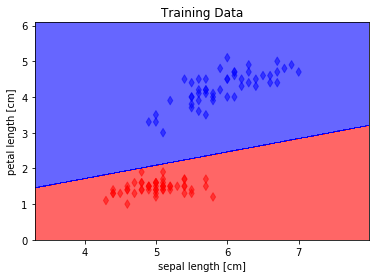

In [127]:
# Visualización de los datos
plt.title('Training Data')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
data_color = ['r' if i == 0 else 'b' for i in data_y]
plt.scatter(data_x[:,0],data_x[:,1],c=data_color, marker='d', alpha=0.5)
plotRegions(data_x, data_y, 0.01)
plt.show()

---
---

## Paralelización
En el proceso desarrollado en este proyecto, ¿qué partes consideras que podrían optimizarse con paralelización?

## Reto Extra: Clasificación multiclase

La principal limitación del perceptrón es su linealidad, es decir, solamente puede realizar clasificación que sean linealmente separables. Para el caso en que los datos no puedas separarse linealmente o que pertenezcan a más de una categoría, el perceptrón por sí solo es incapaz de realizar una predicción satisfactoria.

La solución para este tipo de problemas es hacer uso de una red neuronal, es decir, utilizar múltiples perceptrones interconectados entre sí para poder obtener una mayor funcionalidad.

<center>
    <img src="neuralnetwork.png" width="400">
    Ejemplo esquemático de una red neuronal.
</center>

Una red neuronal está compuesta de forma general en tres secciones:
1. **Capa de entrada:** Está conformada por las neuronas que reciben directamente las señales de entrada del sistema.
1. **Capa de salida:** Esta compuesta por las neuronas cuyas salidas son las señales de salida del sistema.
1. **Capa(s) oculta(s):** Esta capa, que puede ser una o más, tiene las neuronas que se conectan con otros neuronas del sistema. Para el caso de una sola capa oculta, las entradas de las neuronas de esta capa se conectan con las salidas de las neuronas de la capa de entrada, y sus salidas a su vez se conectan con las entradas de las neuronas de la capa de salida.

### Red neuronal
Para fines de este proyecto, se tomarán en cuenta la siguientes caracteríticas:
1. Las redes neuronales tendrán solamente una capa oculta.
1. Las redes neuronales serán completamente interconectadas. Esto significada que todas las salidas de la capa de entrada se conectana a todas las entradas de la capa oculta, y las salidas de la capa oculta se conectan a todos las entradas de la capa de salida.

Otro punto importante es la codificación de las salidas. Normalmente, para problemas de clasificación se maneja *one-hot encoding*. Esto significa que se crea un número de dimensiones igual al número de categorías y se le asigna el valor de uno a la dimensión correspondiente y cero para todas las demás. Ejemplo, en el caso de tener 5 clases, estas se representarían como:
$$ c_0 = [1, 0, 0, 0, 0]$$
$$ c_1 = [0, 1, 0, 0, 0]$$
$$ c_2 = [0, 0, 1, 0, 0]$$
$$ c_3 = [0, 0, 0, 1, 0]$$
$$ c_4 = [0, 0, 0, 0, 1]$$
Este método para manejar las clases permite una mejor predicción de parte de la red neuronal.

#### Ejercicio 5
Implementar una nueva clase para la red neuronal, con su inicialización como la predicción:

In [128]:
# Implementación de la clase de red neuronal
class NeuralNetwork:
    
    def __init__(self, ninputs, nhidden, noutputs):
        self.nInputs = ninputs
        self.nHidden= nhidden
        self.nOutputs =  noutputs
        self.pesos = np.random.choice([0., 1.], size=(3,), p=[.5, .5])#hardcode con 3 pues no recibe inputs aquí para hacer un shape
        pass
    
    def predict(self, inputs):
        z = np.dot(inputs, self.pesos[1:]) + self.pesos[0] # función dot para obtener la suma de xi.wi
        phi = np.where(z >= 0.0, 1, 0)# se seleccionan de
        return phi

Establecida la clase para la red neuronal, necesitamos definir el método con el que se va a realizar el ajuste de los pesos de las múltiples neuronas que componen nuestra red. Para ello necesitamos definir en primer lugar la función de pérdida.

### Función de pérdida

Esta función permite cuantificar que tanto difiere la predicción de los valores reales. Una de las funciones de pérdida más usadas, y que será empleada para este proyecto, es la *pérdida cuadrática*.

$$ L = C \cdot (x - x_{real})^2 $$

Donde $x_{real}$ es el vector de $n$-dimensiones de los valores reales, y $x$ es el vector de los valores obtenidos con la predicción de la red neuronal.

### Backpropagation

Es evidente que el ajuste de pesos como se implementó en el perceptrón. Sin embargo, antes de profundizar en el manejo del aprendizaje en la red neuronal, se necesita estudiar con mayor detalle el SGD.

SGD fue definido anteriormente como:

$$ w^{n+1}_i = w^n_i + \eta \cdot (y_{real} - y_{pred}) \cdot x_i $$

Sin embargo, esta forma solo es válida para el perceptrón que se analizó. Para la red neuronal, la expresión de SGD está dada por:

$$ w^{n+1}_i = w^n_i + \eta \cdot {\partial L \over \partial w_i} $$

Aplicando esta expresión a la red neuronal que se ha estado desarrollando, obtenemos para la capa de salida:

$$ {\partial L \over \partial w_2} = (a_2 - y_{real}) {\partial a_2 \over \partial w_2} $$
$$ {\partial L \over \partial w_2} = [(a_2 - y_{real}) \circ f'(w_2 a_1)] {\partial w_2 a_1 \over \partial w_2} $$
$$ {\partial L \over \partial w_2} = [(a_2 - y_{real}) \circ f'(w_2 a_1)] x_1^T $$
Estableciendo que:
$$ \delta_2 = (a_2 - y_{real}) \circ f'(w_2 a_1) $$
$$ {\partial L \over \partial w_2} = \delta_2 a_1^T $$

La nomenclatura que se maneja es la siguiente:
* El subíndice tiene el rango de 0 a 2, representando las tres capas que compone la red neuronal: 0 = capa de entrada, 1 = capa oculta, 2 = capa de salida.
* Los pesos representan la conexión entre la capa actual y sus entradas.
* $\circ$ simboliza el prodctio de Hadamard.
* $f'$ es la derivada de la función de activación definida en el perceptrón.

Prosiguiendo con la siguiente capa:

$$ {\partial L \over \partial w_1} = (a_2 - y_{real}) {\partial a_2 \over \partial w_1} $$
$$ {\partial L \over \partial w_2} = [(a_2 - y_{real}) \circ f'(w_2 a_1)] {\partial w_2 a_1 \over \partial w_1} $$
$$ {\partial L \over \partial w_2} = \delta_2 {\partial w_2 a_1 \over \partial w_1} $$
$$ {\partial L \over \partial w_2} = w_2^T \delta_2 {\partial a_1 \over \partial w_1} $$
$$ {\partial L \over \partial w_2} = [w_2^T \delta_2 \circ f'(w_1 a_0)] {\partial a_0 \over \partial w_1} $$
$$ {\partial L \over \partial w_2} = \delta_1 x_0^T $$

Análogamente, se puede derivar la expresión para la capa faltante. Un análisis detallado de estas expresiones da luz a la relación entre ellas:
* Para la última capa, es decir, la capa de salida:
$$ \delta_N = (a_N - y_{real}) \circ f'(w_N x_{N-1}) $$
* Para las demás capas:
$$ \delta_i = w_{i+1}^T \delta_{i+1} \circ f'(w_i x_{i-1}) $$
Por consiguiente, la actualización de los pesos se definen como:
$$ w^{n+1}_i = w^n_i - \eta \circ {\partial L \over \partial w_i} = w^n_i - \eta \circ \delta_i x_{i-1}^T $$

#### Ejercicio 6
Implementar tanto la funcionalidad de *backpropagation* como la de entrenamiento a la clase de la red neuronal:

In [11]:
# Implementación de la clase de red neuronal
class NeuralNetwork:
    
    def __init__(self, ninputs, nhidden, noutputs):
        # Proceso de inicialización
        # ninputs: Número de entradas
        # nhidden: Número de neuronas ocultas
        # noutputs: Número de salidas
        # Nota: inicializar los pesos de las entradas con valores aleatorios entre 0 y 1
        pass
    
    def predict(self, inputs):
        # Calcula la predicción de la red neuronal
        # inputs: Vector con las entradas de la red neuronal
        pass
    
    def backpropagation(self, inputs, label, learning_rate):
        # Ajuste la red neuronal utilizando backpropagation
        # inputs: Vector con las entradas de la red neuronal
        # label: Vector de la categoría a la que pertence la entrada
        # learning_rate: Valor entre 0 y 1 para ajustar la taza de aprendizaje
        pass
    
    def train(self, train_inputs, train_labels, epochs):
        # Entrenamiento de la red neuronal aplicando backpropagation
        # train_inputs: Conjunto de vectores de entrada 
        # train_labels: Conjunto de vectores de etiquetas de categoría correspondiente al conjunto de entradas
        # epochs: Número de iteraciones que se va a ejecutar el entrenamiento
        pass

In [12]:
# Selección de Setosa, Versicolor y Virginica
multi_data_y = iris_data.iloc[0:150, 4].values
#multi_data_y = np.where(data_y == 'Iris-setosa', 0, 1)
multi_label_y = [[1,0,0] if i == 'Iris-setosa' else i for i in multi_data_y]
multi_label_y = [[0,1,0] if i == 'Iris-versicolor' else i for i in multi_label_y]
multi_label_y = [[0,0,1] if i == 'Iris-virginica' else i for i in multi_label_y]

# Selección de longitud de sépalo y pétalo
multi_data_x = iris_data.iloc[0:150, [0,2]].values

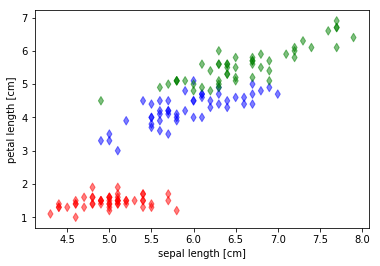

In [13]:
# Visualización de los datos
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
multi_color_y = ['r' if i == 'Iris-setosa' else i for i in multi_data_y]
multi_color_y = ['b' if i == 'Iris-versicolor' else i for i in multi_color_y]
multi_color_y = ['g' if i == 'Iris-virginica' else i for i in multi_color_y]
plt.scatter(multi_data_x[:,0],multi_data_x[:,1],c=multi_color_y, marker='d', alpha=0.5)
plt.show()

Para poder visualizar el poder de la red neuronal, se utilizará para un problema de multiclasificación para el conjunto de datos Iris.
#### Ejercicio 7
Utilizar la red neuronal para resolver el problema de clasificación de tres especies en base a la longitud de sépalo y pétalo.

In [14]:
# Implementar código de la red neuronal para este problema

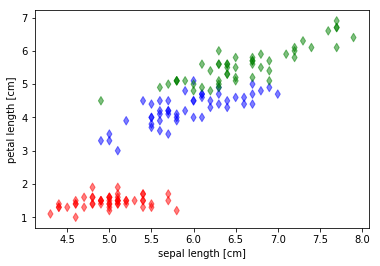

In [15]:
# Visualización de los datos
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
multi_color_y = ['r' if i == 'Iris-setosa' else i for i in multi_data_y]
multi_color_y = ['b' if i == 'Iris-versicolor' else i for i in multi_color_y]
multi_color_y = ['g' if i == 'Iris-virginica' else i for i in multi_color_y]
plt.scatter(multi_data_x[:,0],multi_data_x[:,1],c=multi_color_y, marker='d', alpha=0.5)
# Agregar la visualización de la predicción de la red neuronal
plt.show()